In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv('traintitanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


### MCAR
The above instance of our datset is an example for MCAR, because the probability of embarked missing is by chance and is equally likely for all other observations in our dataset.

Here the missing values can be ignored as they are two in muber we can treat them as rows which does not add much value to our dataset.This is called Complete Case Analysis which means that the data is not modified but deleted. The advantage is that data is not modified butthe disadvantage is that information is lost

In [5]:
df1=df[df['Age'].isnull()]
df1.Survived.value_counts()

0    125
1     52
Name: Survived, dtype: int64

### MNAR
From the above line of code we can infer that the age is missing for most of the people who does not survive in the disaster. This can happen because we cannot include in the datset because of lack of information and rest of the survived column might have ignored this column.

## Imputation Mechanisms for MNAR

So here in this mechanism we are trying to impute the missing values using three mechanisms. End of the disribution imputation, capturing missing values with additional values and arbiratary value imputation. These mehanisms are robust for MNAR as they preserve the importance of missingness. However they have their own drawbacks.

### End of distribution imputation

C:\Users\udays\AppData\Local\conda\conda\envs\deeplearning\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\udays\AppData\Local\conda\conda\envs\deeplearning\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\udays\AppData\Local\conda\conda\envs\deeplearning\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


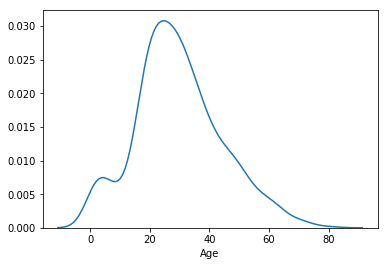

In [6]:
sns.distplot(df['Age'],hist=False,kde=True)
plt.show()

We can infer that age almost follows gaussian distribution. So we can use the values of either mean+3*sd or mean-3*sd for the imputation. As negative values does not make sense for age we go with the upper bound value

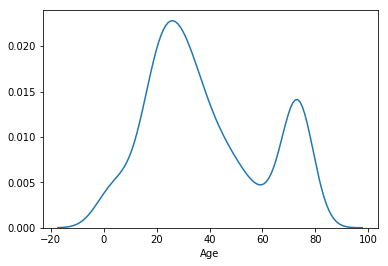

In [7]:
from statistics import stdev
import statistics
df1=df.copy()
df1['Age']=df1['Age'].fillna(df1['Age'].mean()+3* df1.Age.std())
sns.distplot(df1['Age'],hist=False,kde=True)
plt.show()

we can see that the shape of the distribution is changed. This is one of the drawbacks of end of distribution imputation. The other disadvantages are its masks the importance of predictive power of the target. It also introduces outliers if NA's are less and mask true outliers if NA's are large

## Capturing Missing Values with Additional Values
In this method the null values are imputed with either mean or median. Besides an additional variable is introduced to capture the significance of missing values.

In [8]:
df1=df.copy()
df1['age_flag']=np.where(df1['Age'].isnull(),0,1)
df1['Age']=df1['Age'].fillna(df1['Age'].median())
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_flag
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


We can see that the number of features are increased. This is the drawback of this method but it captures the importance of the missing values. 

### Imputing with Arbitary Values
In this method the null values are imputed with a random variable. This method is used to capture missing values. However these arbitary values are choosen based on domain expertise. Let us consider that random variable as 60

In [9]:
df1=df.copy()
df1['Age']=df1['Age'].fillna(60)
df1.Age.isnull().sum()

0

the drawback of this method is to choose the random variable. This requires a lot of domain expertise. Besides the distribution is distorted and the predictive power of the variable is masked if the missing values are more in number

## Simple Mean/Median Imputation
It is used to replace missing values with mean/median for the null values. We use mode for categorical values.

In [10]:
df1=df.copy()
df1['Age_mean']=df1['Age'].fillna(df1.Age.mean())
df1['Age_median']=df1['Age'].fillna(df1.Age.median())
df1.Age_mean.isnull().sum()

0

The advantages of this method is easy and fast to implement. The disadvantage is the distortion of covariance and original variance.

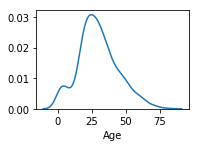

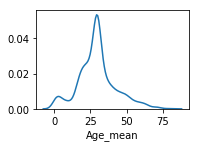

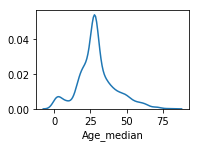

In [11]:
plt.subplot(2,2,1)
sns.distplot(df1['Age'],hist=False,kde=True)
plt.show()
plt.subplot(2,2,2)
sns.distplot(df1['Age_mean'],hist=False,kde=True)
plt.show()
plt.subplot(2,2,3)
sns.distplot(df1['Age_median'],hist=False,kde=True)
plt.show()

## Random Sample Imputation Method
In this method we will replace null values by taking a sample from the variable.

In [16]:
df1=df.copy()
random_sample=df1['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=0)
random_sample.index=df1[df1['Age'].isnull()].index
df1.loc[(df['Age'].isnull()),'Age']=random_sample
df1['Age'].isnull().sum()

0

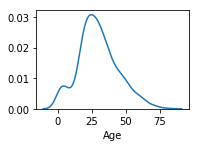

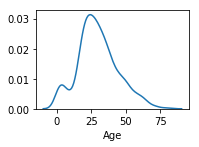

In [17]:
plt.subplot(2,2,1)
sns.distplot(df['Age'],hist=False,kde=True)
plt.show()
plt.subplot(2,2,2)
sns.distplot(df1['Age'],hist=False,kde=True)
plt.show()

The above code takes a random sample and then replaces the values. The advantage is that the distribution is preserved. But the disadvantage is that randomness is introduced into our dataset.

## MAR
This type of missing values are caused totally because they are dependant on the other explanatory variables. Let us consider the following case to establish this context

In [18]:
df=pd.read_csv('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/churn_data_st.csv')
df.head()

,customerID,gender,SeniorCitizen,tenure,ServiceCount,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,2,Month-to-month,Yes,29.85,29.85,No
1,5575-GNVDE,Male,0,34,4,One year,No,56.95,1889.50,No
2,3668-QPYBK,Male,0,2,4,Month-to-month,Yes,53.85,108.15,Yes
3,7795-CFOCW,Male,0,45,4,One year,No,42.30,1840.75,No
4,9237-HQITU,Female,0,2,2,Month-to-month,Yes,70.70,151.65,Yes


In [19]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
tenure               0
ServiceCount         0
Contract             0
PaperlessBilling     0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [20]:
df[df['TotalCharges'].isnull()]

,customerID,gender,SeniorCitizen,tenure,ServiceCount,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,0,5,Two year,Yes,52.55,NaN,No
753,3115-CZMZD,Male,0,0,7,Two year,No,20.25,NaN,No
936,5709-LVOEQ,Female,0,0,7,Two year,No,80.85,NaN,No
1082,4367-NUYAO,Male,0,0,8,Two year,No,25.75,NaN,No
1340,1371-DWPAZ,Female,0,0,6,Two year,No,56.05,NaN,No
3331,7644-OMVMY,Male,0,0,7,Two year,No,19.85,NaN,No
3826,3213-VVOLG,Male,0,0,8,Two year,No,25.35,NaN,No
4380,2520-SGTTA,Female,0,0,7,Two year,No,20.00,NaN,No
5218,2923-ARZLG,Male,0,0,7,One year,Yes,19.70,NaN,No
6670,4075-WKNIU,Female,0,0,7,Two year,No,73.35,NaN,No


Here we can see that the totalcharges are zero as the tenure is zero. This means that the missing values should be replaced with 0 as the customer did not start paying the bill